# Introduction to Scikit-Learn (sklearn)

0. An end to end sklearn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions or our data
4. Evaluating the model 
5. =>Improve the model
6. Save and load trained model
7. Putting it all together!

## 5. Improve the model
### There are three ways of tunning parameters
1. By Hand
2. #Randomly with RandomSearchCV
3. Exhaustively by GridSearchCV

In [123]:
## how to get hyperparameters in the model?
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

model = RandomForestRegressor()
(model.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Tunning by hand

We're going to adjust:
- max_depth
- max_features
- min_samples_leaf
- min_samples_split
- n_estimators

In [124]:
from sklearn.metrics import (accuracy_score,
                             f1_score, 
                             recall_score,
                             precision_score,
                             r2_score, 
                             mean_absolute_error, 
                             mean_squared_error)


def evaluate_classiification_model(y_test, y_pred):
    
    accuracy = accuracy_score(y_test, y_pred) * 100
    precission = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    
    metric_dict = {'accuracy': round(accuracy, 2),
                  'precission': round(precission, 2),
                  'recall': round(recall, 2),
                  'f1': round(f1, 2)}
    [print(each+":", metric_dict[each]) for each in metric_dict.keys()]
    return metric_dict
    
def evaluate_regression_model(y_test, x_pred):
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    metric_dict = {'r2': round(r2, 2),
                  'mae': round(mae, 2),
                  'mse': round(mse, 2)}
    [print(each+":", metric_dict[each]) for each in metric_dict.keys()]
    return metric_dict


In [129]:
from sklearn.ensemble import RandomForestClassifier

# load the data 
heart_disease = pd.read_csv("dataset/heart-disease.csv")

# split into X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

# train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [138]:
from sklearn.model_selection import (train_test_split,
                                     RandomizedSearchCV)

grid = {"n_estimators": [10, 100, 200, 500, 1200],
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [2, 4, 6],
       "min_samples_leaf": [1, 2, 4]}


np.random.seed(42)

# choose a model
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10, # number of models to try
                           cv=5, # cross validation
                           verbose=2)

clf.fit(X_train, y_train)
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; t

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1200]},
                   verbose=2)

In [135]:
rs_clf.best_params_

{'n_estimators': 10,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [140]:
rs_y_preds = rs_clf.predict(X_test)
y_preds = clf.predict(X_test)

print('Original')
evaluate = evaluate_classiification_model(y_test, y_preds)

print("Tuned")
evaluate = evaluate_classiification_model(y_test, rs_y_preds)



Original
accuracy: 83.61
precission: 84.38
recall: 84.38
f1: 84.38
Tuned
accuracy: 86.89
precission: 85.29
recall: 90.62
f1: 87.88


## GridSearchCV

In [149]:
grid2= {"n_estimators": [100, 200, 1000],
       "max_depth": [20, 30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [4, 6],
       "min_samples_leaf": [1, 2]}

In [150]:
from sklearn.model_selection import GridSearchCV

grid_clf = GridSearchCV(estimator=clf,
                       param_grid=grid2,
                       cv=5,
                       verbose=2)

grid_clf.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=20

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features

[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=auto

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   2.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   2.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   2.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   2.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [4, 6],
                         'n_estimators': [100, 200, 1000]},
             verbose=2)

In [151]:
grid_clf.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 200}

In [153]:
rs_y_preds = rs_clf.predict(X_test)
grid_y_preds = grid_clf.predict(X_test)
y_preds = clf.predict(X_test)

print()
print('Original')
baseline_metrix = evaluate_classiification_model(y_test, y_preds)

print()
print("Random")
random_metrix = evaluate_classiification_model(y_test, rs_y_preds)

print()
print("Grid")
grid_metrix = evaluate_classiification_model(y_test, grid_y_preds)


Original
accuracy: 83.61
precission: 84.38
recall: 84.38
f1: 84.38

Random
accuracy: 86.89
precission: 85.29
recall: 90.62
f1: 87.88

Grid
accuracy: 85.25
precission: 84.85
recall: 87.5
f1: 86.15


<AxesSubplot:>

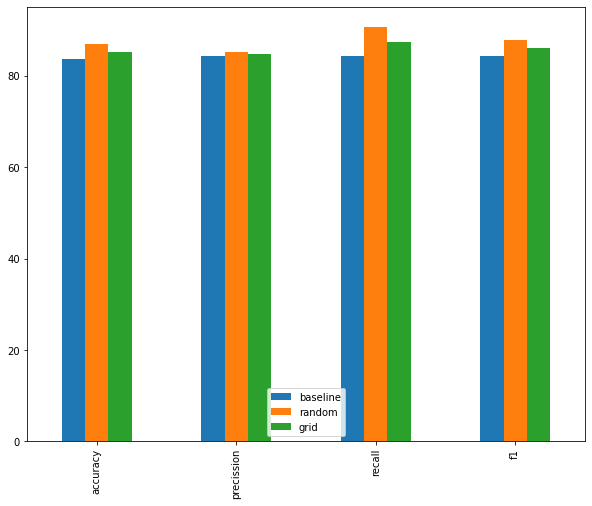

In [154]:
compare_matrix = pd.DataFrame({'baseline': baseline_metrix,
                              'random': random_metrix,
                              'grid': grid_metrix})
compare_matrix.plot.bar(figsize=(10, 8))